In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, sys

In [3]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0,parent_dir)

In [4]:
from scripts.load_data import load_file
from scripts.handling_missing_values import fill_missing_mean, fill_missing_mode
from scripts.data_visualization import univariate_analysis

In [6]:
store = load_file('../datasets/store.csv')
train = load_file('../datasets/train.csv')
test = load_file('../datasets/test.csv')

e:\ML_Projects\modeling-rossman-store-sales\scripts\load_data.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [7]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [32]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [33]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [34]:
print(store.describe())
print(train.describe())
print(test.describe())

            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1

In [35]:
print('Store')
print(store.isnull().sum())
print('train')
print(store.isnull().sum())
print('test')
print(test.isnull().sum())

Store
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
train
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
test
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [8]:
train = pd.merge(store,train, how='left', on='Store')
test = pd.merge(store,test, how='left', on='Store')

In [37]:
train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [39]:
train.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [40]:
train.shape

(1017209, 18)

In [41]:
test

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1.0,4.0,2015-09-17,1.0,1.0,0,0.0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857.0,3.0,2015-09-16,1.0,1.0,0,0.0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713.0,2.0,2015-09-15,1.0,1.0,0,0.0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569.0,1.0,2015-09-14,1.0,1.0,0,0.0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425.0,7.0,2015-09-13,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",37664.0,3.0,2015-08-05,1.0,1.0,0,1.0
41343,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",38520.0,2.0,2015-08-04,1.0,1.0,0,1.0
41344,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",39376.0,1.0,2015-08-03,1.0,1.0,0,1.0
41345,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",40232.0,7.0,2015-08-02,0.0,0.0,0,1.0


In [42]:
test.shape

(41347, 17)

In [10]:
test = fill_missing_mean(test)

In [11]:
train = fill_missing_mean(train)

In [12]:
test.isnull().sum()

Store                            0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                17417
Id                               0
DayOfWeek                        0
Date                           259
Open                             0
Promo                            0
StateHoliday                   259
SchoolHoliday                    0
dtype: int64

In [13]:
train.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [14]:
train.dropna(inplace=True)
test.dropna(inplace=True)

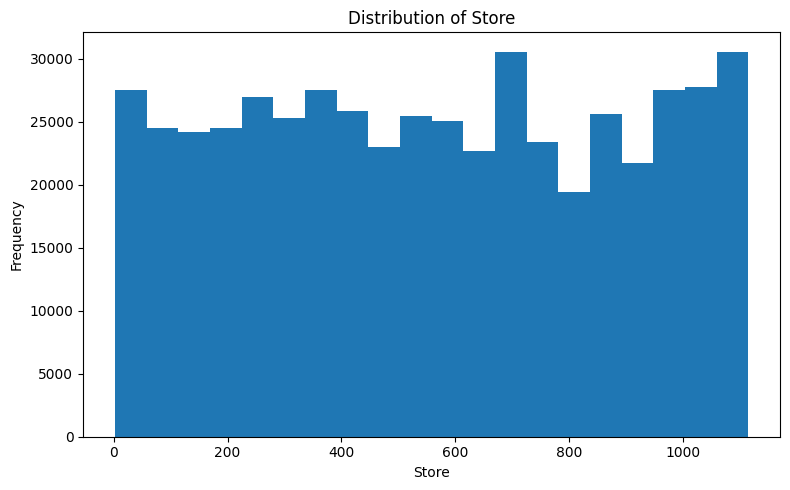

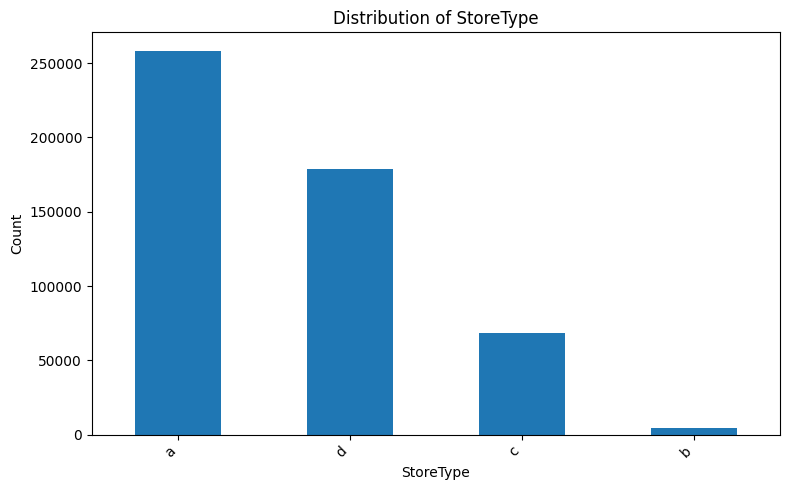

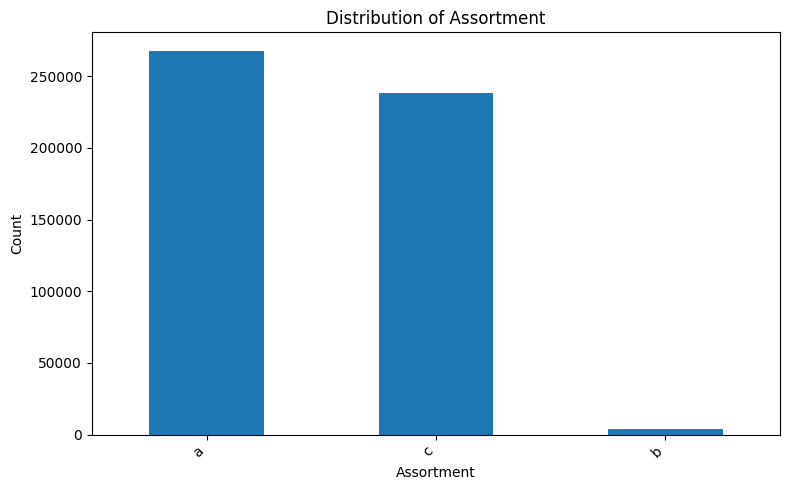

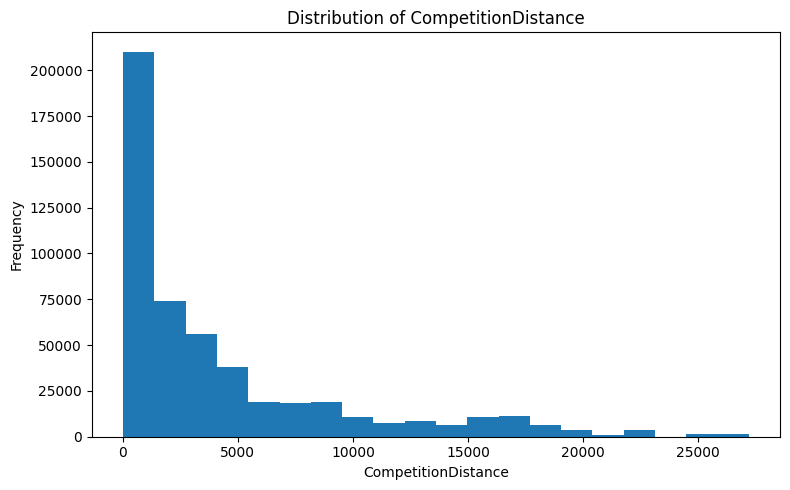

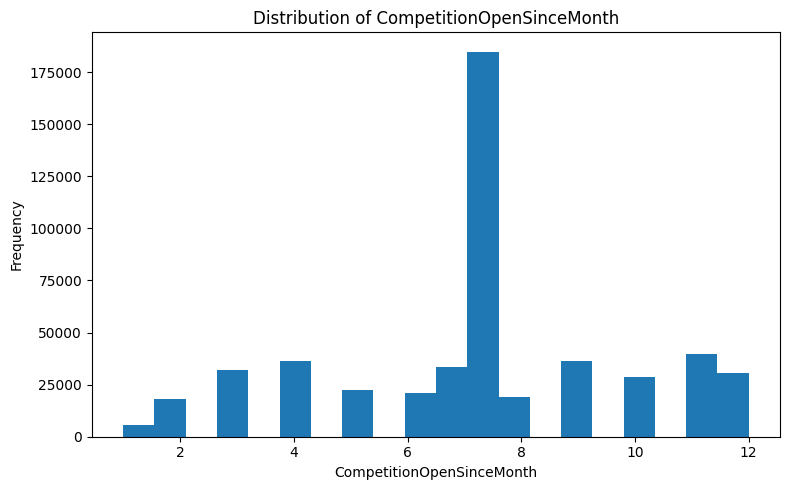

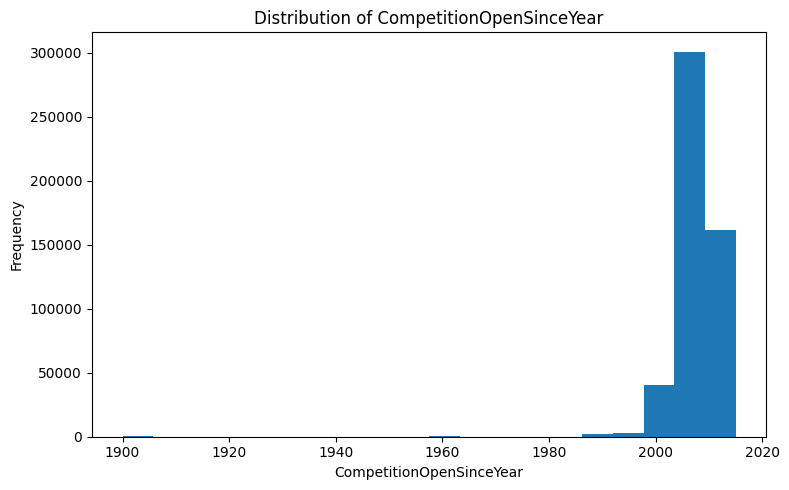

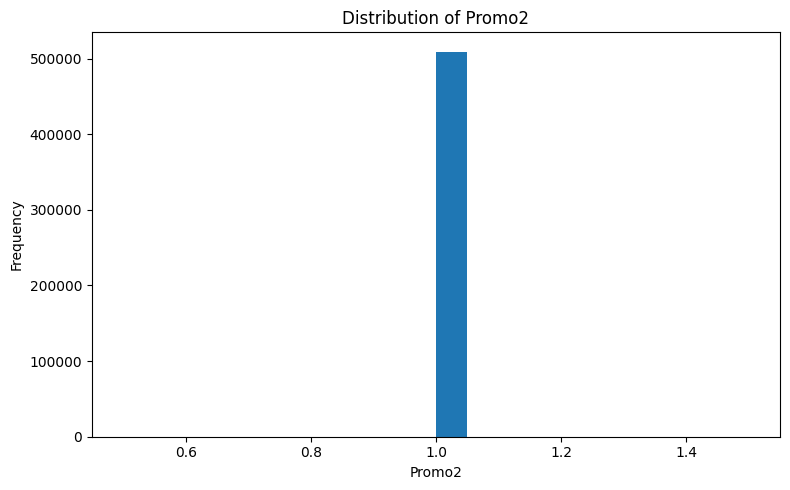

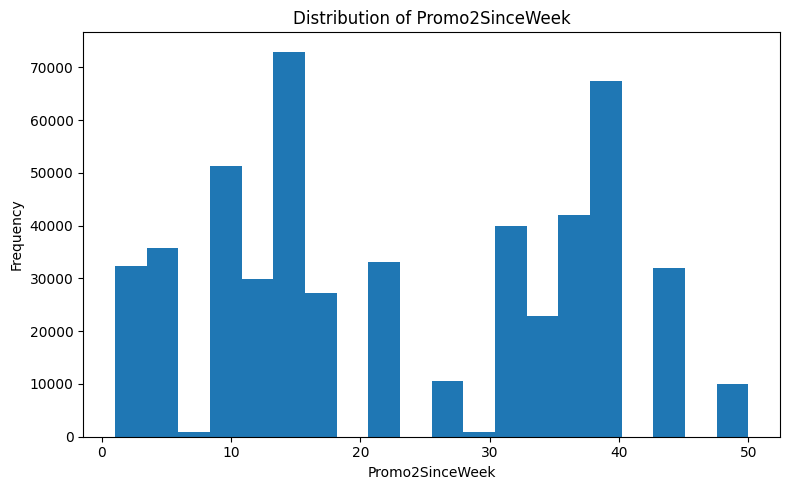

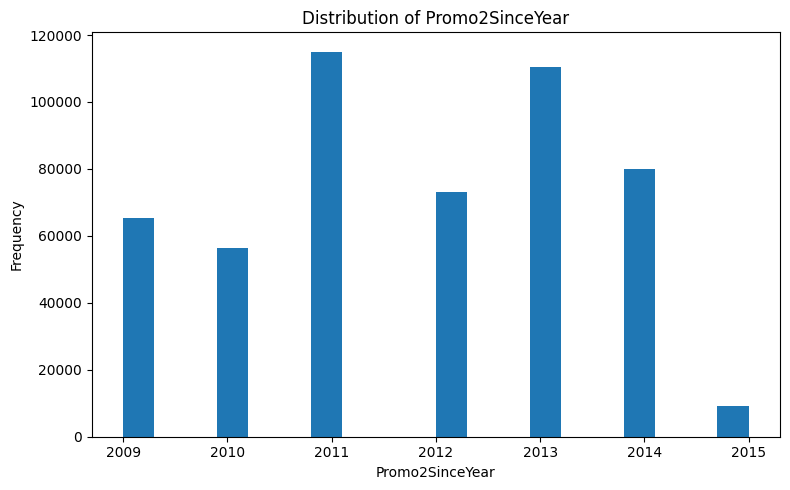

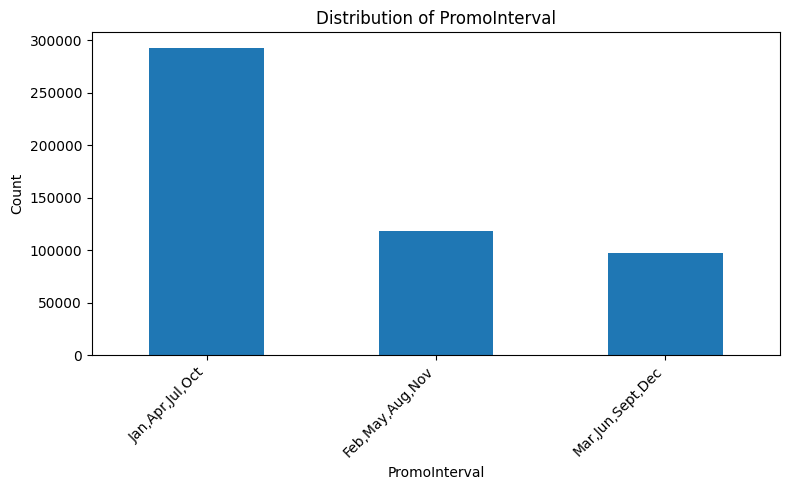

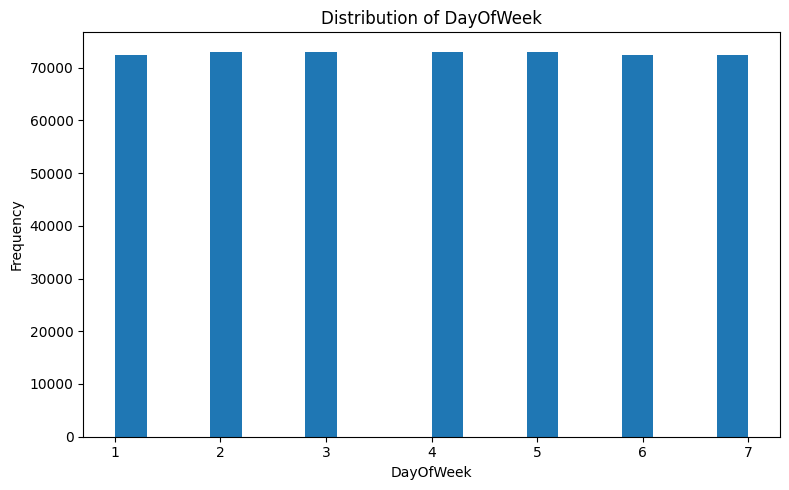

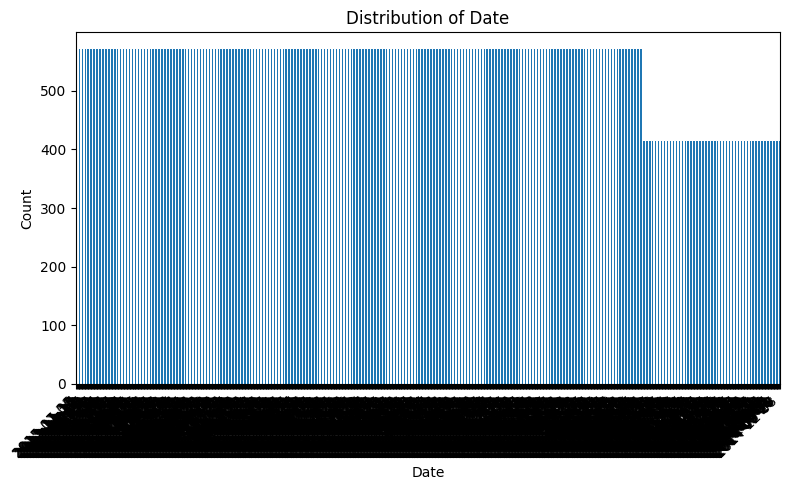

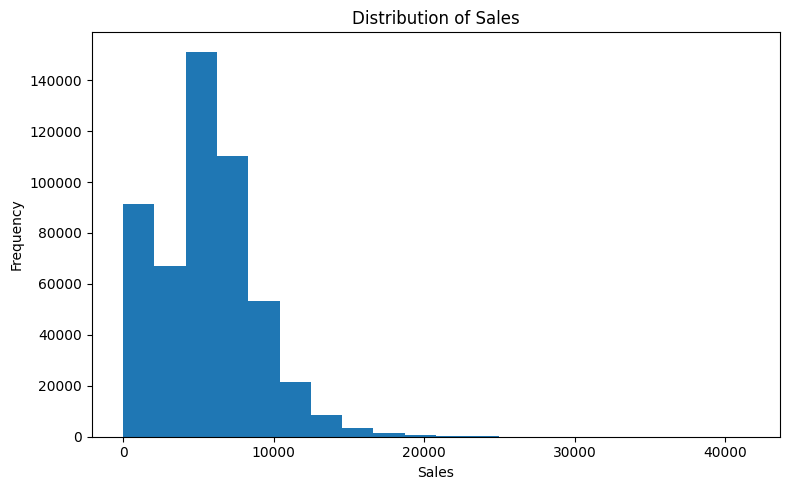

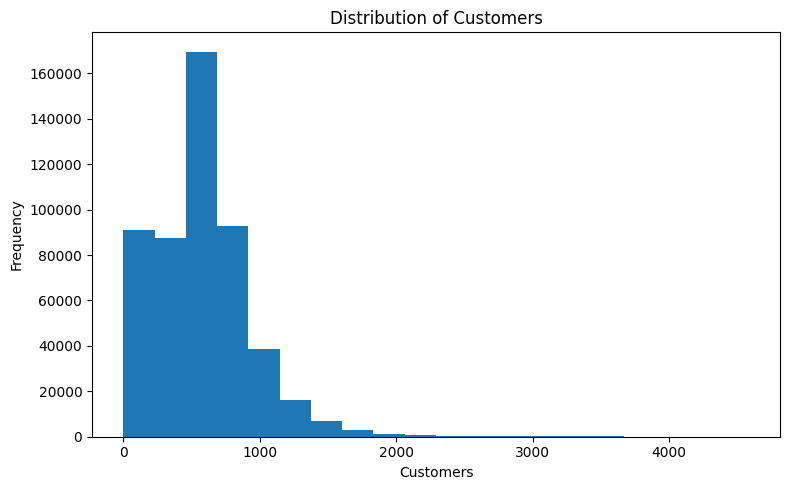

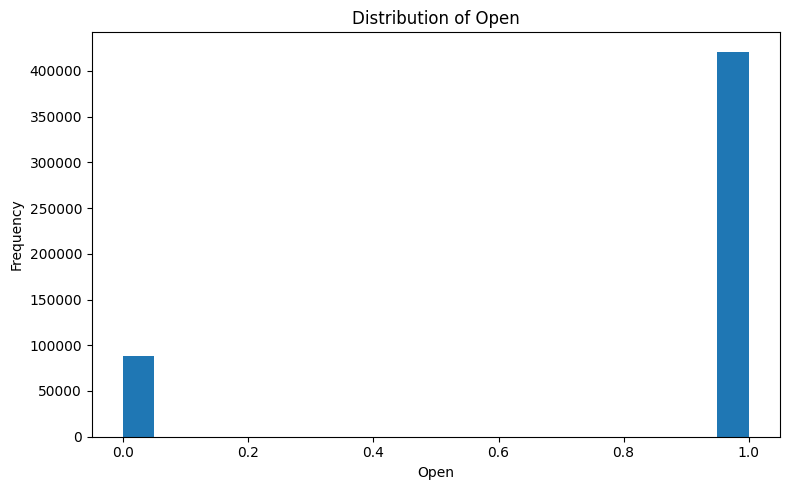

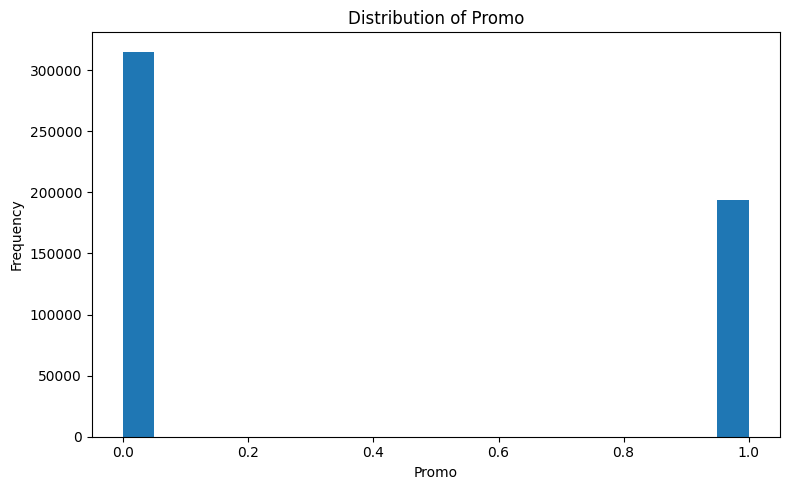

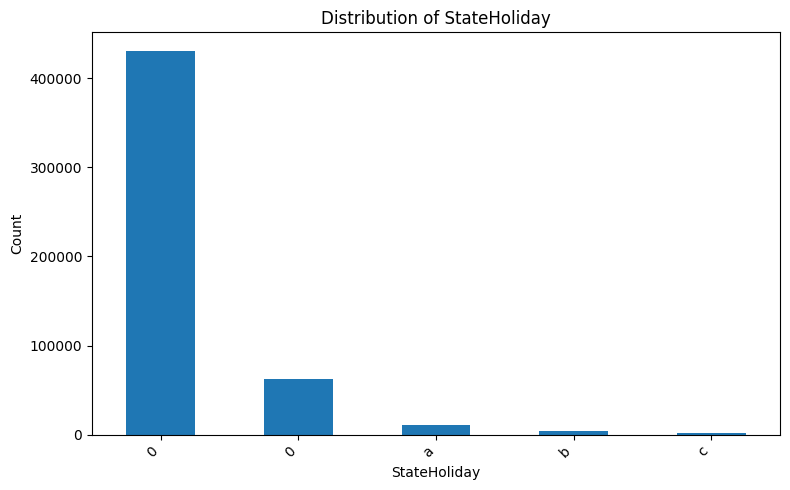

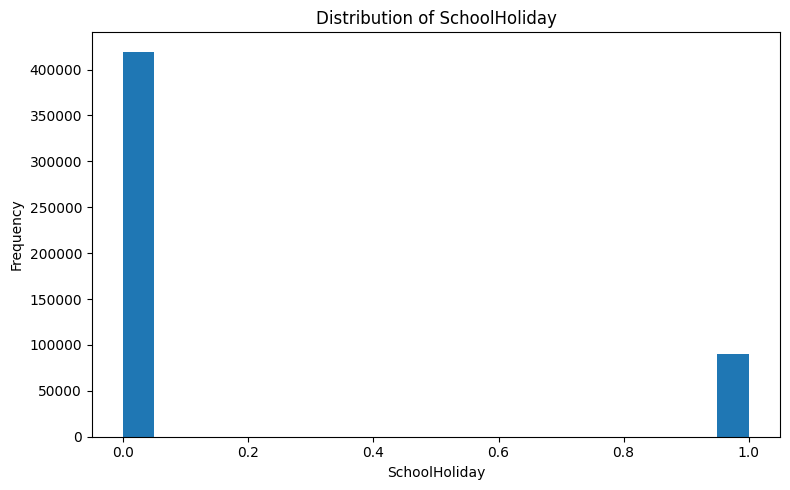

In [15]:
for col in train.columns:
    univariate_analysis(train,col)

In [16]:
...
# scatter plot matrix
sns.scatterplot(df)
plt.show()

NameError: name 'df' is not defined

In [15]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

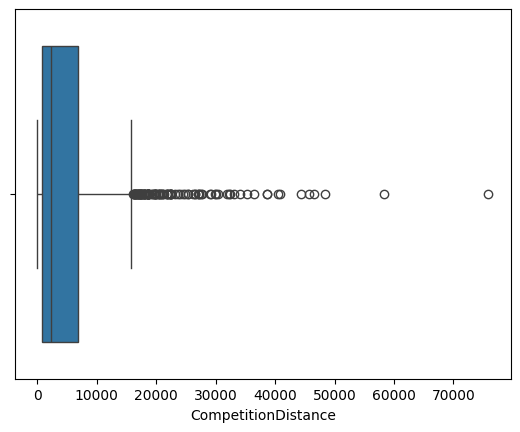

In [18]:
sns.boxplot(x = df['CompetitionDistance'])
plt.show()

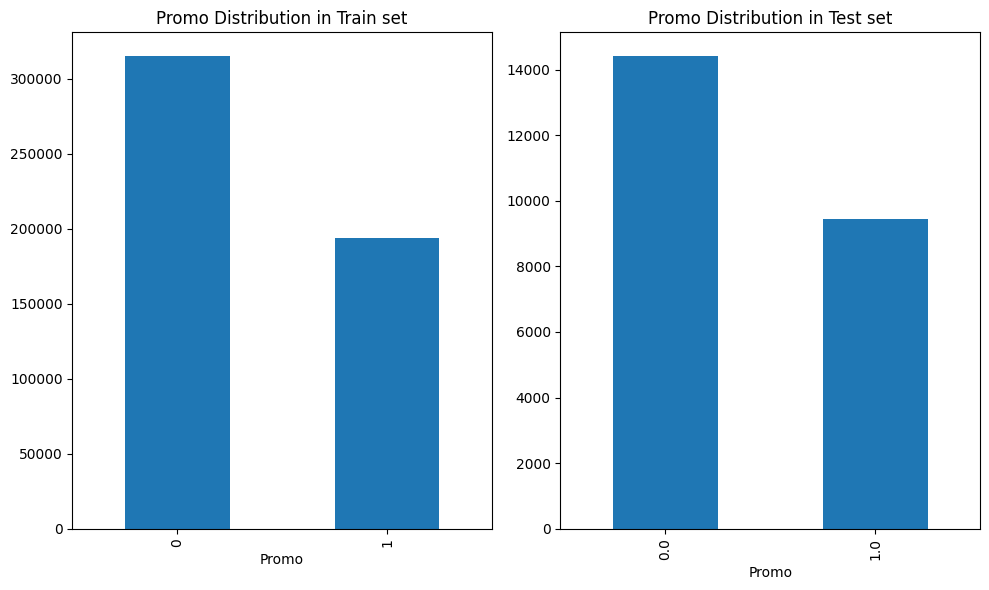

In [48]:
# Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train['Promo'].value_counts().plot(kind = 'bar', title = 'Promo Distribution in Train set')

plt.subplot(1,2,2)
test['Promo'].value_counts().plot(kind = 'bar', title = 'Promo Distribution in Test set')

plt.tight_layout()
plt.show()

In [50]:
train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [67]:
train.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object

In [46]:
holiday_sales = train.groupby(['StateHoliday'])['Sales'].mean().reset_index()

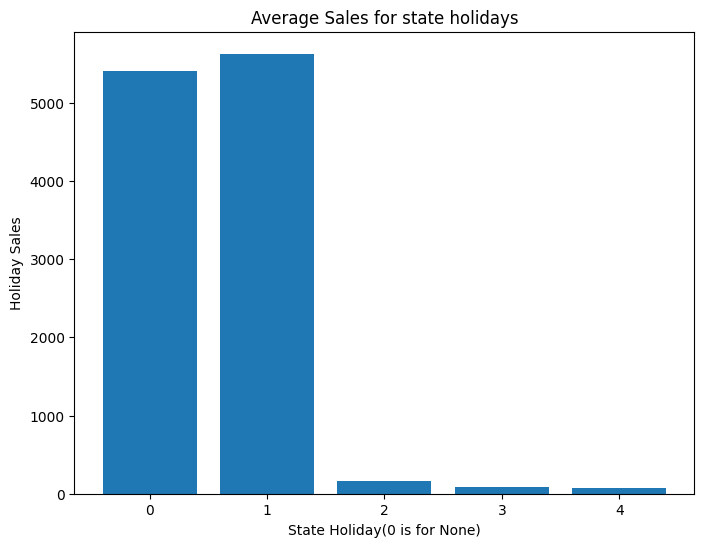

In [51]:
holiday_sales['StateHoliday'] = holiday_sales['StateHoliday'].astype('category')

plt.figure(figsize=(8,6))
plt.bar(holiday_sales['StateHoliday'].cat.codes, holiday_sales['Sales'])
plt.title('Average Sales for state holidays')
plt.xlabel('State Holiday(0 is for None)')
plt.ylabel('Holiday Sales')
plt.show()

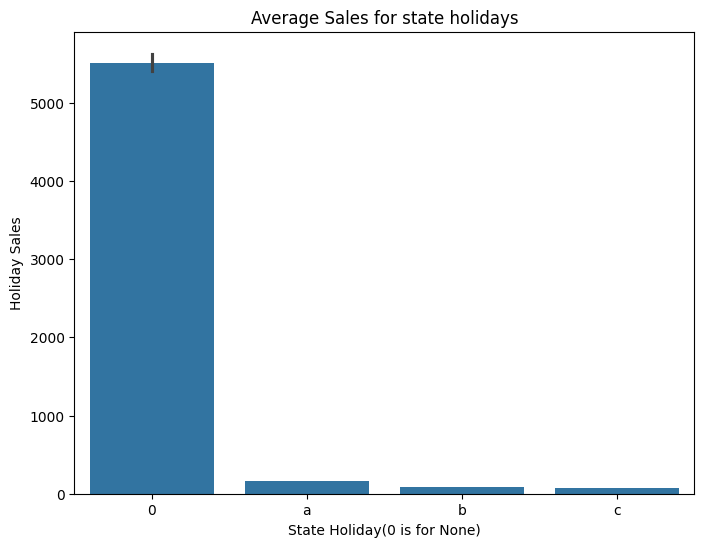

In [52]:
holiday_sales['StateHoliday'] = holiday_sales['StateHoliday'].astype('category')

plt.figure(figsize=(8,6))
sns.barplot(data =holiday_sales, x='StateHoliday',y='Sales')
plt.title('Average Sales for state holidays')
plt.xlabel('State Holiday(0 is for None)')
plt.ylabel('Holiday Sales')
plt.show()

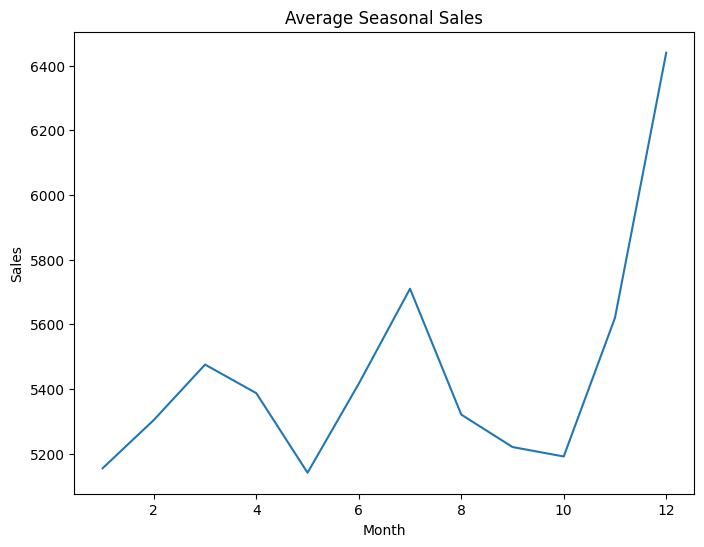

In [44]:
train['Date'] = pd.to_datetime(train['Date'])
train['Month'] = train['Date'].dt.month
seasonal_sales = train.groupby(['Month'])['Sales'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.plot(seasonal_sales['Month'], seasonal_sales['Sales'])
plt.title('Average Seasonal Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

###### Understanding the Chart

###### •  X-Axis (Month): Represents the months of the year, from 1 to 12.
###### •  Y-Axis (Sales): Represents the average sales for each month.
###### •  Line Plot: The line connects the average sales values for each month, showing how sales change over the year.


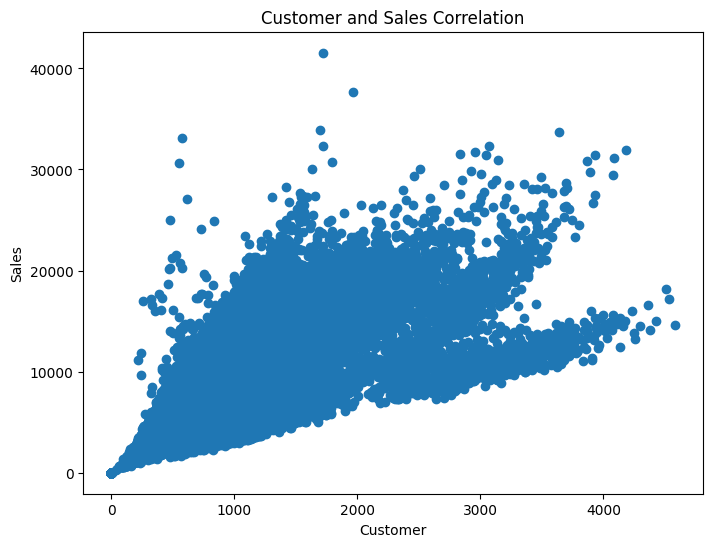

Correlation value between Sales and Customers: 0.8778885834236081


In [79]:
plt.figure(figsize=(8,6))
plt.scatter(train['Customers'], train['Sales'])
plt.title('Customer and Sales Correlation')
plt.xlabel('Customer')
plt.ylabel('Sales')
plt.show()

print(f"Correlation value between Sales and Customers: {train['Customers'].corr(train['Sales'])}")

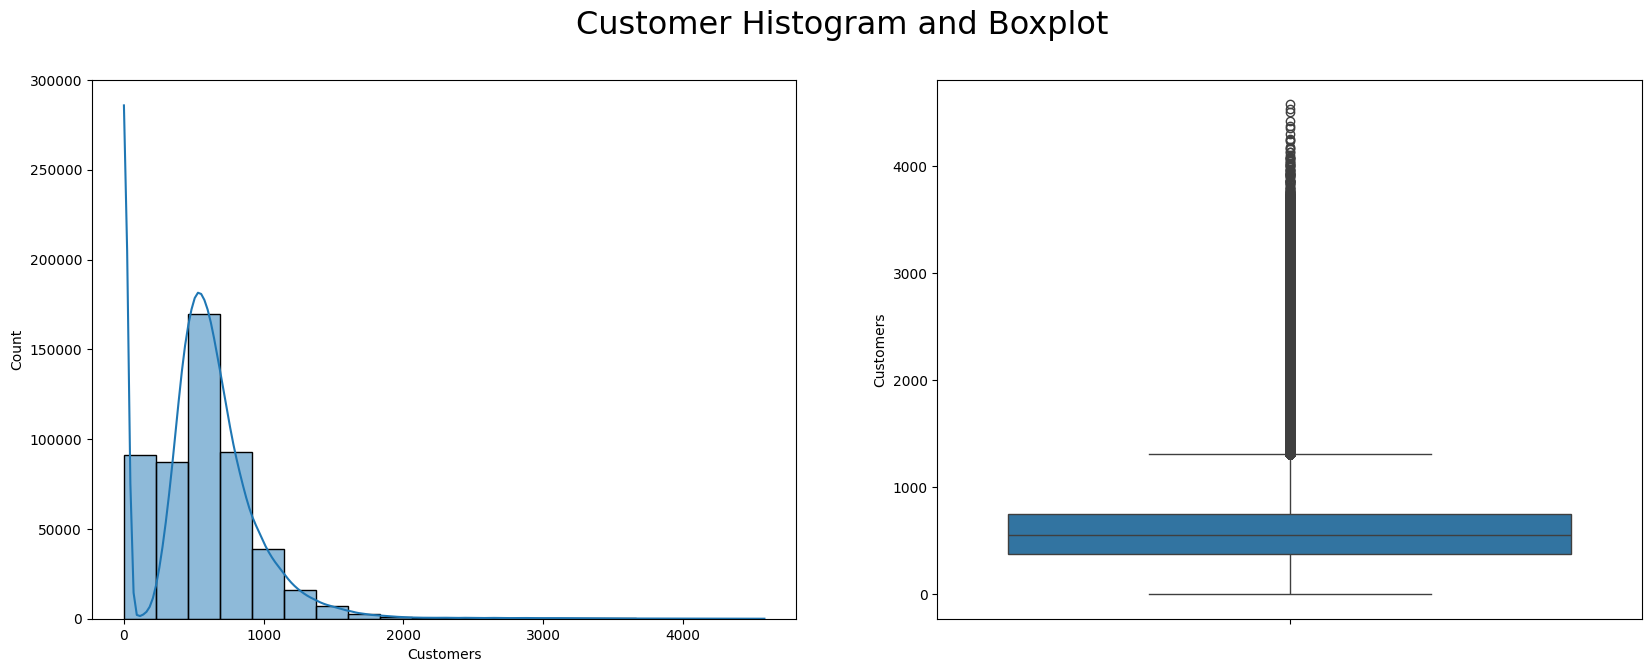

In [128]:
fig,ax = plt.subplots(1,2,figsize = (20, 7))
plt.suptitle('Customer Histogram and Boxplot',fontsize =23)
fig = sns.histplot(train, x=train.Customers,bins=20,kde= True,ax=ax[0])
fig = sns.boxplot(data = train.Customers,ax=ax[1])
plt.show()

In [96]:
train.groupby(['Promo'])[['Customers','Sales']].mean().reset_index()


,Promo,Customers,Sales
0,0,457.428304,4091.109464
1,1,735.775637,7588.424429


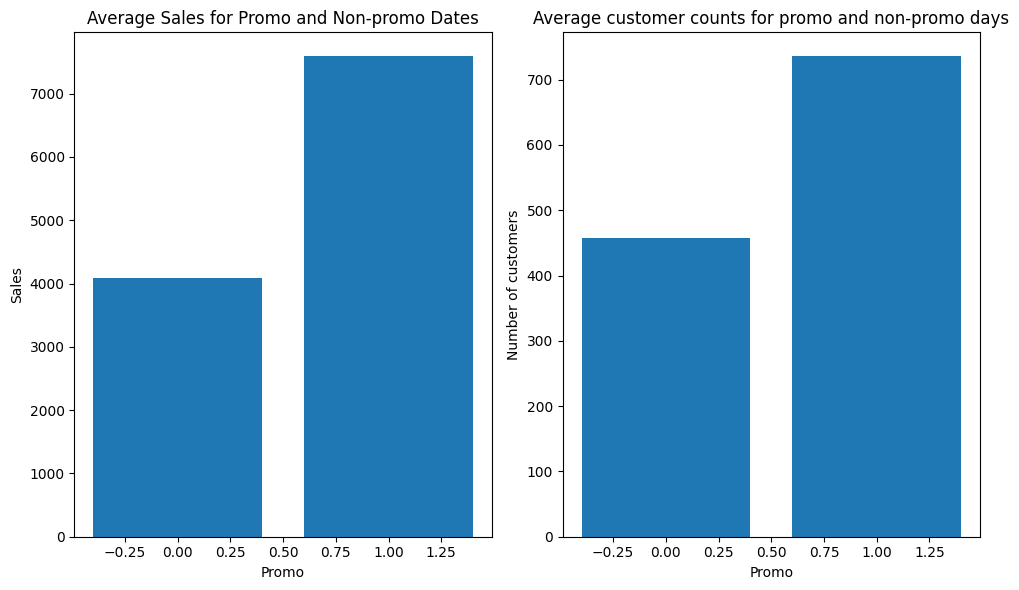

In [17]:
promo_saales= train.groupby(['Promo'])[['Customers','Sales']].mean().reset_index()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(promo_saales['Promo'], promo_saales['Sales'])
plt.title('Average Sales for Promo and Non-promo Dates')
plt.xlabel('Promo')
plt.ylabel('Sales')

plt.subplot(1,2,2)
plt.bar(promo_saales['Promo'], promo_saales['Customers'])
plt.title('Average customer counts for promo and non-promo days')
plt.xlabel('Promo')
plt.ylabel('Number of customers')

plt.tight_layout()
plt.show()

In [18]:
train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [19]:
promo_stores = train.groupby(['Store'])[['Sales','Promo']].mean().sort_values(by='Sales',ascending=False)

In [20]:
promo_stores

,Sales,Promo
Store,,
756,13706.774947,0.382166
335,13313.939490,0.382166
380,11955.070064,0.382166
544,11670.604034,0.382166
769,10825.902335,0.382166
...,...,...
970,2732.457537,0.382166
656,2690.546709,0.382166
210,2641.309979,0.382166


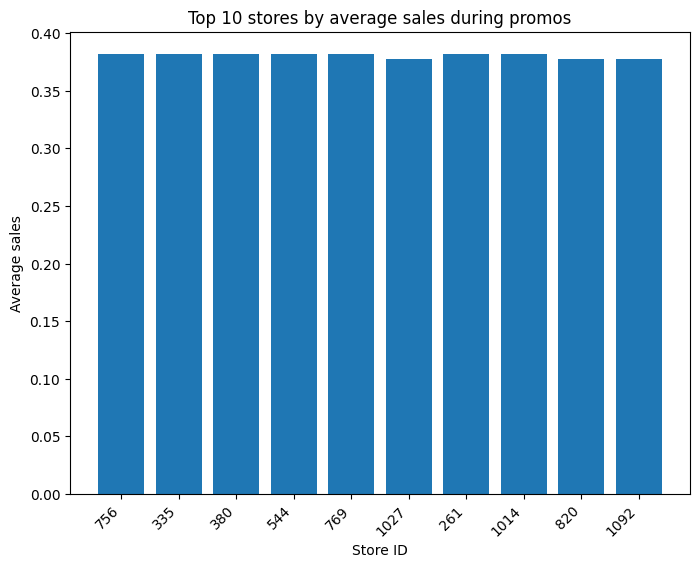

In [21]:
promo_stores = train.groupby(['Store'])[['Sales','Promo']].mean().sort_values(by='Sales',ascending=False).reset_index()
plt.figure(figsize=(8,6))
plt.bar(promo_stores.head(10)['Store'].astype(str),promo_stores.head(10)['Promo'])
plt.title('Top 10 stores by average sales during promos')
plt.xlabel('Store ID')
plt.ylabel('Average sales')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [22]:
train['Weekdays']= train['Date'].dt.weekday
week_sales = train.groupby(['Weekdays'])['Sales'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.plot(week_sales['Weekdays'], week_sales['Sales'])
plt.title("Average sales by weekday (0 is Monday, 6 is Sunday)")
plt.xlabel('Day of the week')
plt.ylabel('Average Sales')
plt.xticks(week_sales['Weekdays'])
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [23]:
store_open_weekdays = train.groupby(['Store', 'Weekdays'])['Open'].sum().reset_index()
store_open_weekdays = store_open_weekdays[store_open_weekdays['Open']>0]
store_open_weekdays = store_open_weekdays.groupby('Store')['Weekdays'].count().reset_index()
store_open_weekdays = store_open_weekdays[store_open_weekdays['Weekdays'] == 7]

store_open_weekdays_ids = store_open_weekdays['Store'].tolist()


store_open_weekdays = train[train['Store'].isin(store_open_weekdays_ids)]
store_open_weekdays['is_weekend'] = store_open_weekdays['Weekdays'].apply(lambda x: 1 if x>4 else 0)

store_weekend_sales = store_open_weekdays.groupby('is_weekend')['Sales'].mean().reset_index()

plt.figure(figsize=(10,6))

plt.bar(store_weekend_sales['is_weekend'], store_weekend_sales['Sales'])
plt.title('Average sales of stores that are open everyday')
plt.xlabel('Is weekend (1 is yes)')
plt.ylabel('Average Sales')
plt.show()

KeyError: 'Weekdays'

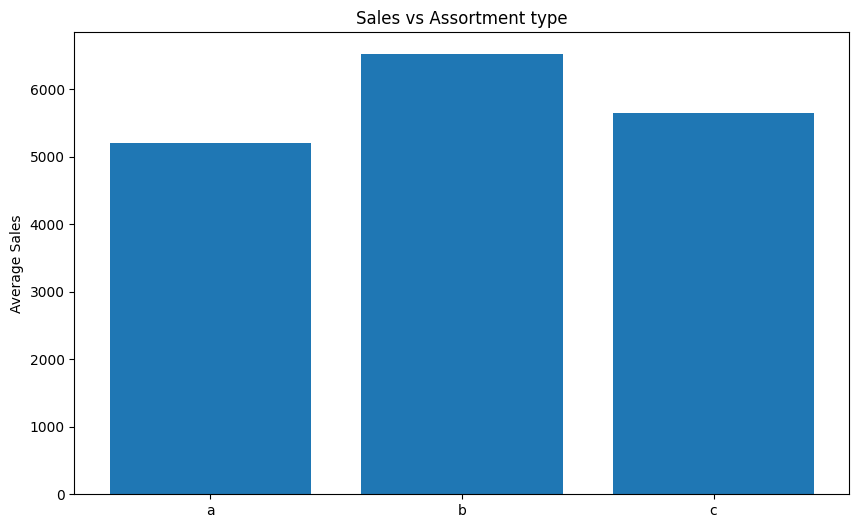

In [131]:
assortment_sales = train.groupby('Assortment')['Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(assortment_sales['Assortment'], assortment_sales['Sales'])
plt.title('Sales vs Assortment type')
plt.ylabel('Average Sales')
plt.show()


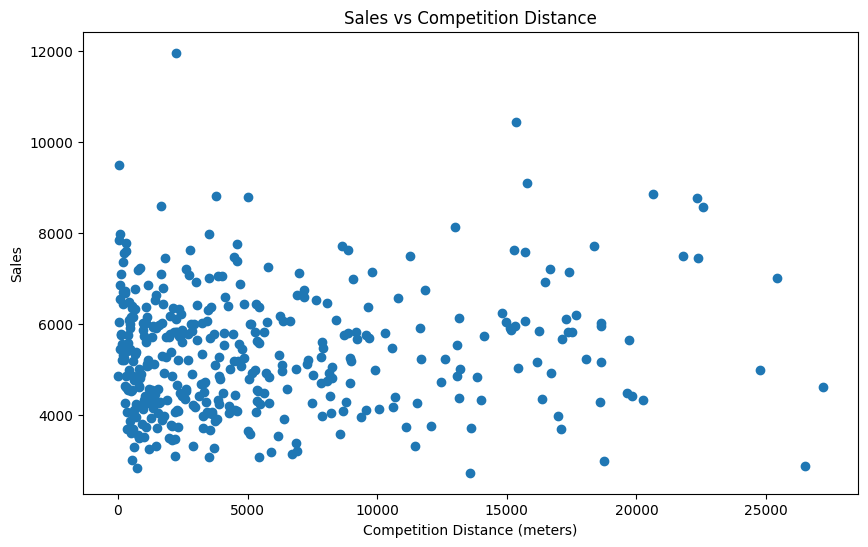

Correlation between Sales and CompetitionDistance:0.018522431135138386


In [24]:
compitetor_distance_sales = train.groupby('CompetitionDistance')['Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(compitetor_distance_sales['CompetitionDistance'], compitetor_distance_sales['Sales'])

plt.title("Sales vs Competition Distance")
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.show()

print(f"Correlation between Sales and CompetitionDistance:{train['Sales'].corr(train['CompetitionDistance'])}")

In [53]:
print(f"Estimate Sales from {train.Date.dt.date.min()} to {train.Date.dt.date.max()}")
train

Estimate Sales from 2013-01-01 to 2015-07-31


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,DayOfYear,DayOfWeekName,Holiday
942,2,a,a,570.0,11.000000,2007.000000,1,13.0,2010.0,"Jan,Apr,Jul,Oct",...,1,0,1,2015,7,31,31,212,Friday,0
943,2,a,a,570.0,11.000000,2007.000000,1,13.0,2010.0,"Jan,Apr,Jul,Oct",...,1,0,1,2015,7,30,31,211,Thursday,0
944,2,a,a,570.0,11.000000,2007.000000,1,13.0,2010.0,"Jan,Apr,Jul,Oct",...,1,0,1,2015,7,29,31,210,Wednesday,0
945,2,a,a,570.0,11.000000,2007.000000,1,13.0,2010.0,"Jan,Apr,Jul,Oct",...,1,0,1,2015,7,28,31,209,Tuesday,0
946,2,a,a,570.0,11.000000,2007.000000,1,13.0,2010.0,"Jan,Apr,Jul,Oct",...,1,0,1,2015,7,27,31,208,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,1,2013,1,5,1,5,Saturday,0
1017205,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,1,2013,1,4,1,4,Friday,0
1017206,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,1,2013,1,3,1,3,Thursday,0
1017207,1115,d,c,5350.0,7.222866,2008.690228,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,1,2013,1,2,1,2,Wednesday,0


In [60]:
print(f'{(train['Date'].dt.year).astype(str)+ '-' + (train['Date'].dt.month).astype(str)}')

942        2015-7
943        2015-7
944        2015-7
945        2015-7
946        2015-7
            ...  
1017204    2013-1
1017205    2013-1
1017206    2013-1
1017207    2013-1
1017208    2013-1
Name: Date, Length: 509178, dtype: object


In [25]:
train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [28]:
from utils.loger import logger
from utils.close_log import close_loggers

logger = logger(__name__)



In [31]:
logger.debug("This is a debug message (for detailed info)")  # will only print if log level is debug
logger.info("Starting the experiment.")  # general steps to log
logger.warning("Temperature is getting high.") # things that might cause errors
logger.error("An error occurred in the data analysis.") # errors that happen
logger.critical("Critical error. Experiment aborted.") # errors that will prevent completion

close_loggers()

2025-01-14 11:44:01,667 - INFO - __main__ - Starting the experiment.
2025-01-14 11:44:01,670 - WARNING - __main__ - Temperature is getting high.
2025-01-14 11:44:01,674 - ERROR - __main__ - An error occurred in the data analysis.
2025-01-14 11:44:01,677 - CRITICAL - __main__ - Critical error. Experiment aborted.


In [167]:
close_loggers()

##### Predictive Modelling

###### Preprocessing

In [121]:
# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas.tseries.holiday import USFederalHolidayCalendar


In [ ]:
train['Date'] = pd.to_datetime(train['Date'], errors='coerce')
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week.astype(int)
train['DayOfWeek'] = train['Date'].dt.weekday
train['DayOfYear'] = train['Date'].dt.dayofyear
train['DayOfWeekName'] =train['Date'].dt.strftime('%A')
train['weekend'] = (train['DayOfWeek']>=5).astype(int)


In [39]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=train['Date'].min(), end=train['Date'].max())
train['Holiday'] = train['Date'].isin(holidays).astype(int)
train['DaysUntilNextHoliday'] = (holidays - train['Date']).dt.days.fillna(99999) # Use a large value if holiday is in the past
train['DaysUntilNextHoliday'] = train['DaysUntilNextHoliday'].apply(lambda x: x if x > 0 else 99999)
train['DaysUntilNextHoliday'] = train.groupby(['Store'])['DaysUntilNextHoliday'].cummin()

train['DaysSinceLastHoliday'] = (train['Date'] - holidays).dt.days.fillna(99999)  # Use a large value if holiday is in the future
train['DaysSinceLastHoliday'] = train['DaysSinceLastHoliday'].apply(lambda x: x if x > 0 else 99999)
train['DaysSinceLastHoliday'] =train.groupby(['Store'])['DaysSinceLastHoliday'].cummin()

# Beginning, middle, end of month features
train['BeginningOfMonth'] = (train['Day'] <= 5).astype(int)
train['MidOfMonth'] = ((train['Day'] > 10) & (train['Day'] < 20)).astype(int)
train['EndOfMonth'] = (train['Day'] >= 25).astype(int)    

ValueError: cannot add indices of unequal length

In [61]:
train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'DayOfYear',
       'DayOfWeekName', 'Holiday'],
      dtype='object')

In [64]:
train_df = train.drop(columns=['PromoInterval','Customers'],axis=1)

In [72]:
train_df = train_df.drop(columns=['DayOfWeekName'],axis=1)

In [73]:
cat_cols = train_df.select_dtypes(include=['object']).columns
cat_cols

Index(['StoreType', 'Assortment', 'StateHoliday'], dtype='object')

In [82]:
train_df['StateHoliday'] =train_df['StateHoliday'].apply(lambda x: '0' if x=='o' else x)

In [104]:
train_df = train_df.drop(columns=['Date'],axis=1)

In [105]:

label_encoders = {}
for column in train_df.select_dtypes(include=['object']).columns:
    train_df[column] = train_df[column]
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    label_encoders[column] = le

In [106]:
train_df.dtypes

Store                          int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
DayOfWeek                      int32
Sales                          int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
Year                           int32
Month                          int32
Day                            int32
WeekOfYear                     int64
DayOfYear                      int32
Holiday                        int64
dtype: object

In [107]:
X = train_df.drop('Sales', axis=1)
y = train_df['Sales']


In [96]:
X = pd.get_dummies(X, drop_first=True)

In [108]:
scalar = MinMaxScaler()

X_scaled = scalar.fit_transform(X)


In [ ]:
train_df.to_csv('../datasets/sales_data.csv')

In [111]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(x_train,y_train)

prediction = model.predict(x_test)

In [116]:
prediction

array([   0.  , 4325.85, 4808.24, ..., 4511.35, 3603.56, 5730.56],
      shape=(101836,))

In [119]:
print(mean_squared_error(prediction,y_test))

619719.8253773273


In [122]:
print(r2_score(prediction,y_test))

0.9470961730641724


In [123]:
print(mean_absolute_error(prediction,y_test))

467.4264188499156


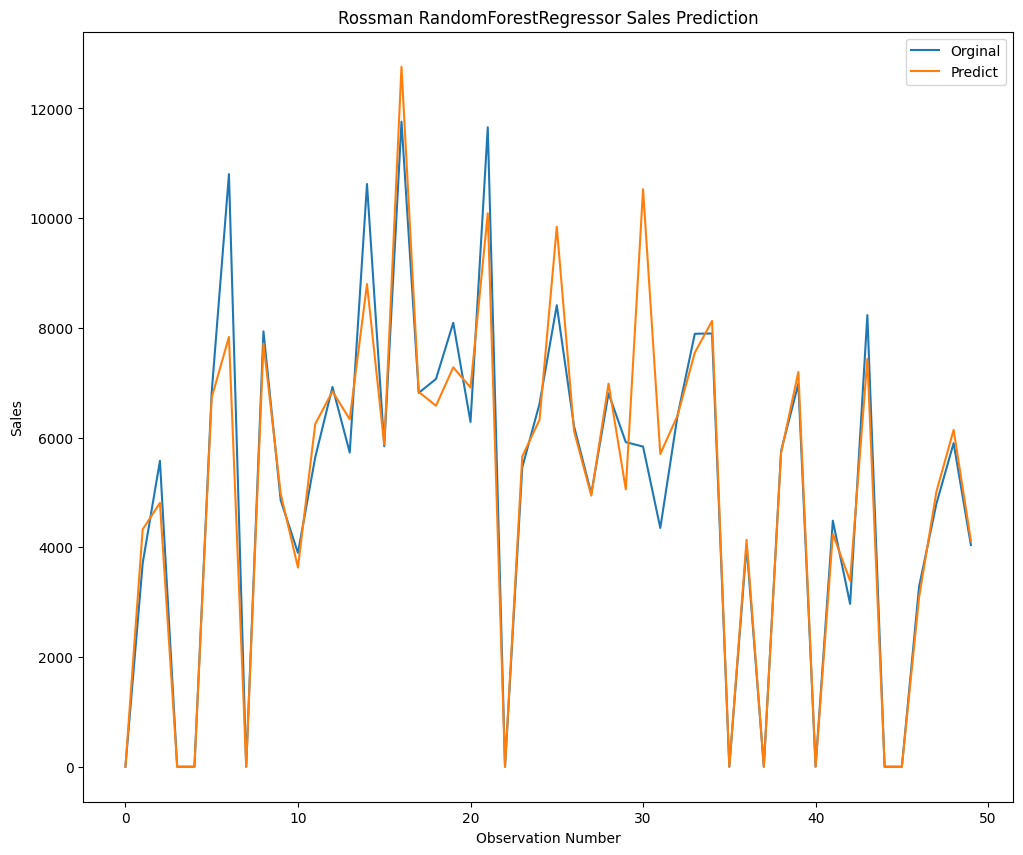

In [125]:
plt.figure(figsize=(12,10))
plt.plot(range(len(y_test[:50])),y_test[:50],label="Orginal")
plt.plot(range(len(y_test[:50])),prediction[:50],label="Predict")
plt.title("Rossman RandomForestRegressor Sales Prediction")
plt.ylabel("Sales")
plt.xlabel("Observation Number")
plt.legend()
plt.show()


Feature ranking

Feature 10 , Open 0.5008
Feature 11 , Promo 0.0884
Feature 3 , CompetitionDistance 0.0813
Feature 0 , Store 0.0564
Feature 9 , DayOfWeek 0.0402
Feature 7 , Promo2SinceWeek 0.0348
Feature 8 , Promo2SinceYear 0.031
Feature 18 , DayOfYear 0.0288
Feature 5 , CompetitionOpenSinceYear 0.0288
Feature 4 , CompetitionOpenSinceMonth 0.0271
Feature 16 , Day 0.0238
Feature 2 , Assortment 0.0168
Feature 1 , StoreType 0.0148
Feature 17 , WeekOfYear 0.0101
Feature 14 , Year 0.01
Feature 15 , Month 0.0037
Feature 13 , SchoolHoliday 0.0024
Feature 19 , Holiday 0.0004
Feature 12 , StateHoliday 0.0004
Feature 6 , Promo2 0.0


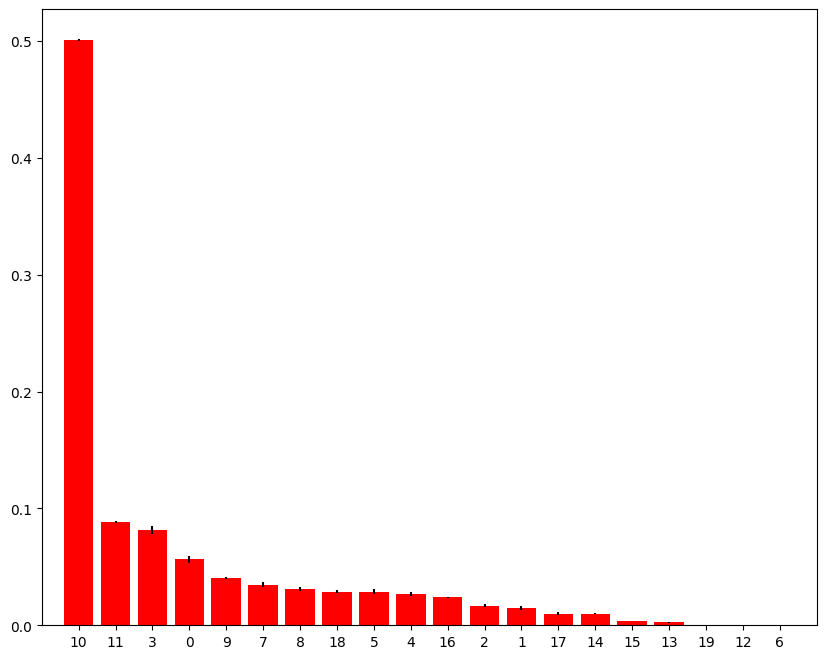

In [126]:
# feature importabnce for random forest model:
importances = model.feature_importances_
std=np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

indices=np.argsort(importances)[::-1]
colnames=list(x_train.columns)

# print the feature ranking:
print("\nFeature ranking\n")
for f in range(x_train.shape[1]):
    print ("Feature", indices[f], ",", colnames[indices[f]], round(importances[indices[f]],4))
    
plt.figure(figsize=(10,8))
plt.bar(range(x_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()
